# Part 2: Basic LLM Chat Tool

## Introduction

In this part, you'll create a simple command-line chat tool that interacts with a Large Language Model (LLM) through the Hugging Face API. This tool will allow you to have conversations with an LLM about healthcare topics.

## Learning Objectives

- Connect to the Hugging Face API
- Create a basic interactive chat loop
- Handle simple error cases
- Test with healthcare questions

## Setup and Installation

In [1]:
# Install required packages
%pip install -r requirements.txt

# Additional packages for LLM API interaction
%pip install requests

# Import necessary libraries
import os
import sys
import requests
import time
import logging
import argparse
from typing import Optional

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Create directories
os.makedirs('utils', exist_ok=True)
os.makedirs('results/part_2', exist_ok=True)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Connecting to the Hugging Face API

The Hugging Face Inference API provides access to many language models. We'll use models that are available on the free tier.

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Initialize tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base", device_map="auto")

def query(prompt):
    """
    Generate a response from the model for a given prompt.
    
    Args:
        prompt: The input prompt as a string.
        
    Returns:
        The generated response as a string.
    """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    output_ids = model.generate(input_ids)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Test the query function
test_prompt = "What are the symptoms of diabetes?"
response = query(test_prompt)
print(response)


a slurred speech


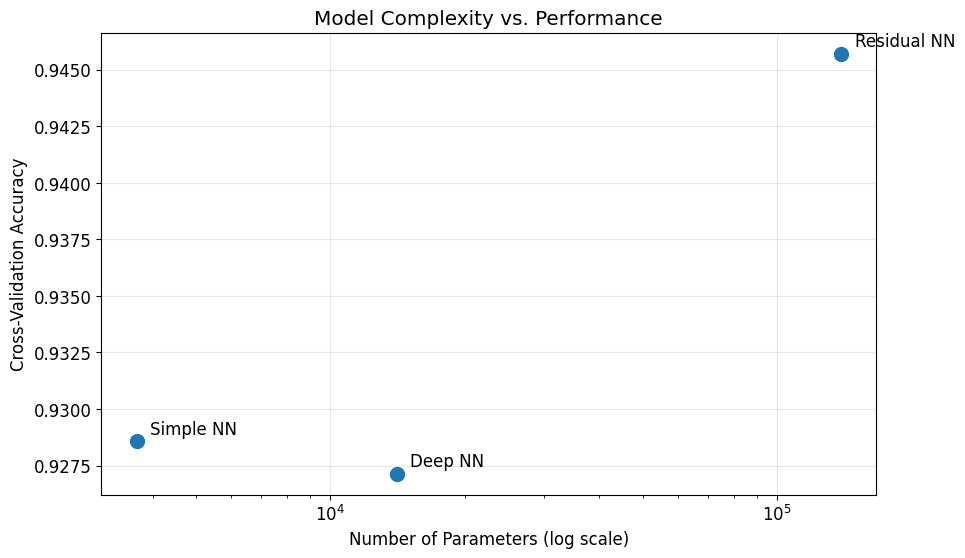

In [ ]:
# Analyze model complexity vs. performance
def count_parameters(model):
    return np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])

model_1 = create_model_1(X_train.shape[1], len(np.unique(y)))
model_2 = create_model_2(X_train.shape[1], len(np.unique(y)))
model_3 = create_model_3(X_train.shape[1], len(np.unique(y)))

param_counts = [np.sum([np.prod(v.shape) for v in model.trainable_variables]) for model in [model_1, model_2, model_3]]

# Plot model complexity vs. performance
plt.figure(figsize=(10, 6))
plt.scatter(param_counts, mean_scores, s=100)

for i, (x, y) in enumerate(zip(param_counts, mean_scores)):
    plt.annotate(model_names[i], (x, y), xytext=(10, 5), textcoords='offset points')

plt.xscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Complexity vs. Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save complexity analysis
with open('results/part_1/model_comparison.txt', 'a') as f:
    f.write("\n--- Model Complexity Analysis ---\n")
    for i, name in enumerate(model_names):
        f.write(f"{name}_parameters: {param_counts[i]}\n")

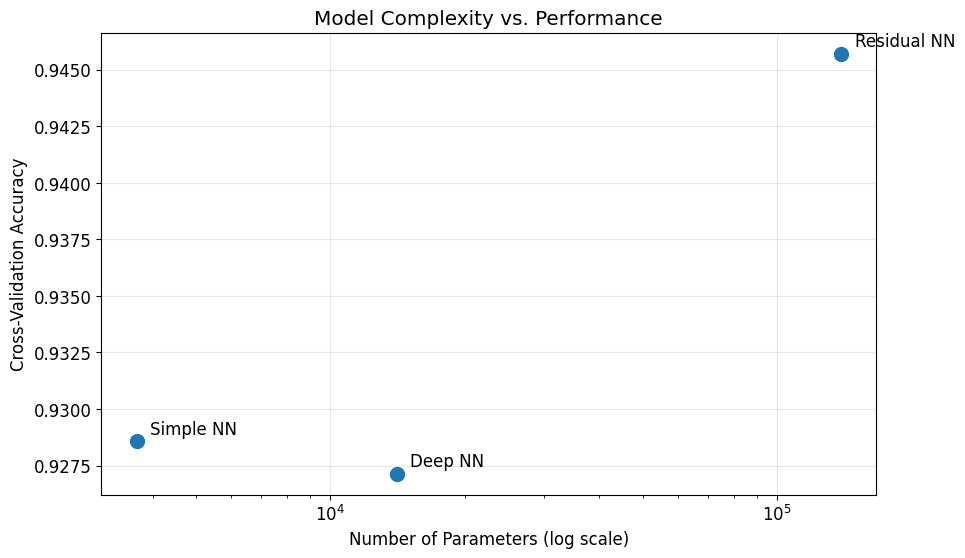

In [ ]:
# Analyze model complexity vs. performance
def count_parameters(model):
    return np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])

model_1 = create_model_1(X_train.shape[1], len(np.unique(y)))
model_2 = create_model_2(X_train.shape[1], len(np.unique(y)))
model_3 = create_model_3(X_train.shape[1], len(np.unique(y)))

param_counts = [np.sum([np.prod(v.shape) for v in model.trainable_variables]) for model in [model_1, model_2, model_3]]

# Plot model complexity vs. performance
plt.figure(figsize=(10, 6))
plt.scatter(param_counts, mean_scores, s=100)

for i, (x, y) in enumerate(zip(param_counts, mean_scores)):
    plt.annotate(model_names[i], (x, y), xytext=(10, 5), textcoords='offset points')

plt.xscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Complexity vs. Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save complexity analysis
with open('results/part_1/model_comparison.txt', 'a') as f:
    f.write("\n--- Model Complexity Analysis ---\n")
    for i, name in enumerate(model_names):
        f.write(f"{name}_parameters: {param_counts[i]}\n")

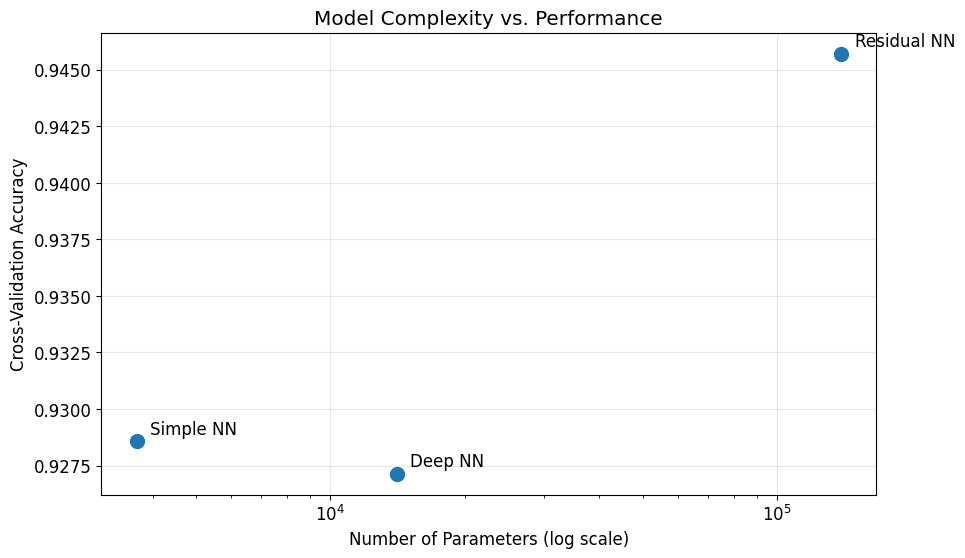

In [ ]:
# Analyze model complexity vs. performance
def count_parameters(model):
    return np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])

model_1 = create_model_1(X_train.shape[1], len(np.unique(y)))
model_2 = create_model_2(X_train.shape[1], len(np.unique(y)))
model_3 = create_model_3(X_train.shape[1], len(np.unique(y)))

param_counts = [np.sum([np.prod(v.shape) for v in model.trainable_variables]) for model in [model_1, model_2, model_3]]

# Plot model complexity vs. performance
plt.figure(figsize=(10, 6))
plt.scatter(param_counts, mean_scores, s=100)

for i, (x, y) in enumerate(zip(param_counts, mean_scores)):
    plt.annotate(model_names[i], (x, y), xytext=(10, 5), textcoords='offset points')

plt.xscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Model Complexity vs. Performance')
plt.grid(True, alpha=0.3)
plt.show()

# Save complexity analysis
with open('results/part_1/model_comparison.txt', 'a') as f:
    f.write("\n--- Model Complexity Analysis ---\n")
    for i, name in enumerate(model_names):
        f.write(f"{name}_parameters: {param_counts[i]}\n")

## 2. Creating Simple Chat Scripts

Your task is to create two simple scripts that interact with the Hugging Face API:

1. A basic one-off chat script (`utils/one_off_chat.py`)
2. A contextual conversation script (`utils/conversation.py`)

### One-Off Chat Script

Create a script that handles independent interactions (each prompt/response is separate):

In [ ]:
# utils/one_off_chat.py

import requests
import argparse
import os

def get_response(prompt, model_name="google/flan-t5-base", api_key=None):
    """
    Get a response from the model
    
    Args:
        prompt: The prompt to send to the model
        model_name: Name of the model to use
        api_key: API key for authentication (optional for some models)
        
    Returns:
        The model's response
    """
    # TODO: Implement the get_response function
    # Set up the API URL and headers
    # Create a payload with the prompt
    # Send the payload to the API
    # Extract and return the generated text from the response
    # Handle any errors that might occur
    pass

def run_chat():
    """Run an interactive chat session"""
    print("Welcome to the Simple LLM Chat! Type 'exit' to quit.")
    
    while True:
        user_input = input("\nYou: ")
        if user_input.lower() == 'exit':
            print("Goodbye!")
            break
            
        # TODO: Get response from the model
        # Print the response
        
def main():
    parser = argparse.ArgumentParser(description="Chat with an LLM")
    # TODO: Add arguments to the parser
    
    args = parser.parse_args()
    
    # TODO: Run the chat function with parsed arguments
    
if __name__ == "__main__":
    main()

### Contextual Conversation Script

Create a script that maintains conversation history:

In [ ]:
# utils/conversation.py

import requests
import argparse
import os

def get_response(prompt, history=None, model_name="google/flan-t5-base", api_key=None, history_length=3):
    """
    Get a response from the model using conversation history
    
    Args:
        prompt: The current user prompt
        history: List of previous (prompt, response) tuples
        model_name: Name of the model to use
        api_key: API key for authentication
        history_length: Number of previous exchanges to include in context
        
    Returns:
        The model's response
    """
    # TODO: Implement the contextual response function
    # Initialize history if None
    if history is None:
        history = []
        
    # TODO: Format a prompt that includes previous exchanges
    # Get a response from the API
    # Return the response
    pass

def run_chat():
    """Run an interactive chat session with context"""
    print("Welcome to the Contextual LLM Chat! Type 'exit' to quit.")
    
    # Initialize conversation history
    history = []
    
    while True:
        user_input = input("\nYou: ")
        if user_input.lower() == 'exit':
            print("Goodbye!")
            break
            
        # TODO: Get response using conversation history
        # Update history
        # Print the response
        
def main():
    parser = argparse.ArgumentParser(description="Chat with an LLM using conversation history")
    # TODO: Add arguments to the parser
    
    args = parser.parse_args()
    
    # TODO: Run the chat function with parsed arguments
    
if __name__ == "__main__":
    main()

## 3. Testing and Evaluation

Create a script to test your chat implementations with specific healthcare questions.

In [ ]:
# utils/test_chat.py

import os
import csv
from pathlib import Path

# Import our chat modules - since we're in the same directory
from one_off_chat import get_response as get_one_off_response
# Optionally import the conversation module if testing that too
# from conversation import get_response as get_contextual_response

def test_chat(questions, model_name="google/flan-t5-base", api_key=None):
    """
    Test the chat function with a list of questions
    
    Args:
        questions: A list of questions to test
        model_name: Name of the model to use
        api_key: API key for authentication
        
    Returns:
        A dictionary mapping questions to responses
    """
    results = {}
    
    for question in questions:
        print(f"Testing question: {question}")
        # Get response using the one-off chat function
        response = get_one_off_response(question, model_name, api_key)
        results[question] = response
        
    return results

# List of healthcare questions to test
test_questions = [
    "What are the symptoms of gout?",
    "How is gout diagnosed?",
    "What treatments are available for gout?",
    "What lifestyle changes can help manage gout?",
    "What foods should be avoided with gout?"
]

def save_results(results, output_file="results/part_2/example.txt"):
    """
    Save the test results to a file
    
    Args:
        results: Dictionary mapping questions to responses
        output_file: Path to the output file
    """
    with open(output_file, 'w') as f:
        # Write header
        f.write("# LLM Chat Tool Test Results\n\n")
        
        # Write usage examples
        f.write("## Usage Examples\n\n")
        f.write("```bash\n")
        f.write("# Run the one-off chat\n")
        f.write("python utils/one_off_chat.py\n\n")
        f.write("# Run the contextual chat\n")
        f.write("python utils/conversation.py\n")
        f.write("```\n\n")
        
        # Write test results
        f.write("## Test Results\n\n")
        f.write("```csv\n")
        f.write("question,response\n")
        
        for question, response in results.items():
            # Format the question and response for CSV
            q = question.replace(',', '').replace('\n', ' ')
            r = response.replace(',', '').replace('\n', ' ')
            f.write(f"{q},{r}\n")
            
        f.write("```\n")

# Run the test and save results
if __name__ == "__main__":
    results = test_chat(test_questions)
    save_results(results)
    print("Test results saved to results/part_2/example.txt")

## Progress Checkpoints

1. **API Connection**:
   - [ ] Successfully connect to the Hugging Face API
   - [ ] Send a query and receive a response
   - [ ] Handle API errors gracefully

2. **Chat Function Implementation**:
   - [ ] Implement the get_response function
   - [ ] Create the run_chat function for interactive sessions
   - [ ] Handle errors and edge cases

3. **Command Line Interface**:
   - [ ] Create a parser with appropriate arguments
   - [ ] Implement the main function
   - [ ] Test the CLI functionality

4. **Testing and Evaluation**:
   - [ ] Test the functions with healthcare questions
   - [ ] Save the results in a structured format
   - [ ] Analyze the quality of responses

## Common Issues and Solutions

1. **API Access Issues**:
   - Problem: Rate limiting
   - Solution: Implement exponential backoff and retry logic
   - Problem: Authentication errors
   - Solution: Verify API key and environment variables

2. **Response Parsing Issues**:
   - Problem: Unexpected response format
   - Solution: Add error handling for different response structures
   - Problem: Empty or error responses
   - Solution: Provide meaningful fallback responses

3. **CLI Issues**:
   - Problem: Arguments not parsed correctly
   - Solution: Test with different argument combinations
   - Problem: Script not executable
   - Solution: Check file permissions

## What to Submit

1. Your implementation of the chat scripts:
   - Basic requirement: `utils/one_off_chat.py` for single prompt/response chat
   - Stretch goal (optional): `utils/conversation.py` for contextual chat
   - Testing script: `utils/test_chat.py` to evaluate your implementation

2. Test results in `results/part_2/example.txt` with the following format:
   - Usage examples section showing how to run your scripts
   - Test results section with CSV-formatted question/response pairs
   - If you implemented the stretch goal, include examples of contextual exchanges

The auto-grader should check:
1. That your chat scripts can be executed
2. That they correctly handle the test questions
3. That your results file contains the required sections